In [4]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
from adjustText import adjust_text
from matplotlib import rcParams

In [5]:
# uniform
config_uniform = {'MAX.npy' : {'Name' : 'Max', 'line' : (0, (1, 1)), 'n_photons' : [0,10]},
                'AREA.npy' : {'Name' : 'Area', 'line' : (0, (1, 1)), 'n_photons' : [1,22]},

                'PCA 1D.npy' : {'Name' : 'PCA 1D', 'line' : (0, (1, 1)), 'n_photons' : [0,20]},
                'PCA 2D.npy' : {'Name' : 'PCA 2D', 'line' : '-', 'n_photons' : [0,20]},

                'KPCA Sig.npy' : {'Name' : 'PCA Sig. 2D', 'line' : 'dashed', 'n_photons' : [0,17]},
                'KPCA Cos.npy' : {'Name' : 'PCA Cos. 2D', 'line' : '-', 'n_photons' : [0,6]},

                'NMF 1D.npy' : {'Name' : 'NMF 1D', 'line' : '-', 'n_photons' : [0,16]},

                'ISO 1D.npy' : {'Name' : 'Isomap 1D', 'line' : (0, (1, 1)), 'n_photons' : [0,22]},

                'tSNE 1D.npy' : {'Name' : 't-SNE 1D', 'line' : (0, (1, 1)), 'n_photons' : [0,21]},
                'tSNE 2D.npy' : {'Name' : 't-SNE 2D', 'line' : '-',  'n_photons' : [0,23]},

                'UMAP 1D.npy' : {'Name' : 'UMAP 1D', 'line' : (0, (1, 1)),  'n_photons' : [0,24]},
                'UMAP 2D.npy' : {'Name' : 'UMAP 2D', 'line' : '-',  'n_photons' : [0,25]},
                'PTSNE 1D.npy' : {'Name' : 'Param. t-SNE 1D', 'line' : (0, (1, 1)), 'n_photons' : [0,21]},
                'PUMAP 1D.npy' : {'Name' : 'Param. UMAP 1D', 'line' : (0, (1, 1)), 'n_photons' : [0,21]},        
                }

### Confidence

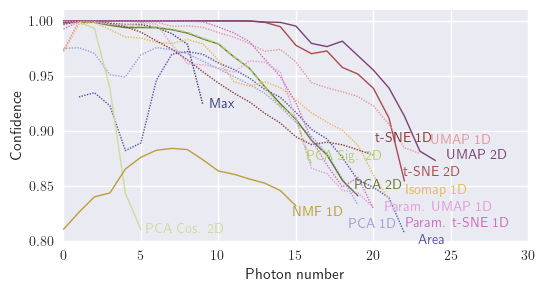

In [6]:
texts = []
objects = []
pad = 0.5
xlim = (0,30)
ylim = (0.8,1.01)
yscale = 'linear'
config = config_uniform
path_results = r'src/Results/'

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, len(config.keys())))

with plt.style.context("seaborn-v0_8"):
        rcParams['text.usetex'] = True
        fig, ax = plt.subplots(figsize = (6,3))

        for index_method, (method, color) in enumerate(zip(config, colors)):

                method_dict = config[method]
                i, f = method_dict['n_photons']
                result = np.load(f'{path_results}/Confidence/{method}', allow_pickle=True)
                confidence = result[:f]
                photon_number = np.arange(i,f+i)

                objects.append(ax.plot(photon_number, confidence, 
                                        c = color, 
                                        alpha=1, 
                                        linewidth = 1,
                                        linestyle = method_dict['line']))
  
                texts.append(ax.text(photon_number[-1]+pad, 
                                        confidence[-1], 
                                        method_dict['Name'], 
                                        color = color, 
                                        fontsize=10, 
                                        weight="bold", 
                                        va = "center"))
            
        adjust_text(texts = texts,
                    ax = ax, 
                    expand=(1.05, 1.2),
                    only_move = {"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    ensure_inside_axes = False) 
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.yscale(yscale)
        plt.ylabel('Confidence')
        plt.xlabel('Photon number')
        plt.savefig(f'{path_results}/Confidence.svg', format='svg', bbox_inches='tight')
        plt.show()